In [21]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('elephant.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 35)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

image0=cv2.imwrite('eleph35.jpg', quant)

image0=cv2.imread('eleph35.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f94b9357fd0>,
 Text(0.5, 1.0, ' image avec cluster=35'))

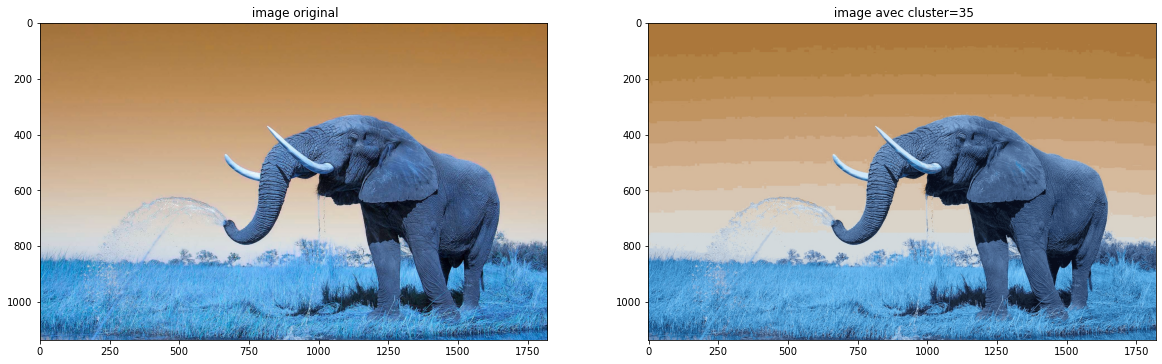

In [23]:
plt.figure(figsize=(20,24))
plt.subplot(121),plt.imshow(image),plt.title(' image original')

plt.subplot(122),plt.imshow(image0),plt.title(' image avec cluster=35')

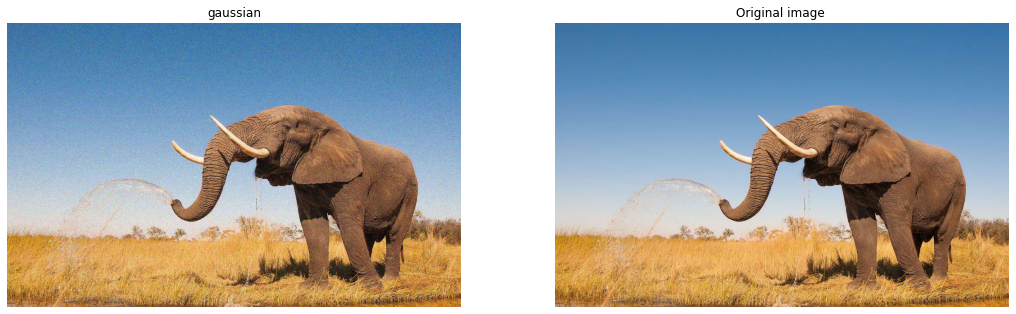

In [25]:
import skimage
import matplotlib.pyplot as plt
img_path="elephant.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, None, r,c,2),plt.title('Original image ')
plt.show()

# Ajouter plus de bruit gausien sur une image


In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("elephant.jpg")[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())


In [ ]:

plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noisy)),np.hstack((noisy, noisy4mul)),np.hstack((noisy4mul, noisy2)),np.hstack((noisy2, noise2)))))
plt.show()

In [ ]:
#On applique un bruit gaussien à un image et à chaque fois on applique une autre fois un bruit gausien jusqu'à 
#que l'image se disparu


# Remove the Gaussian noise from a color image using the Non-local Means Denoising algorithm : 1st method

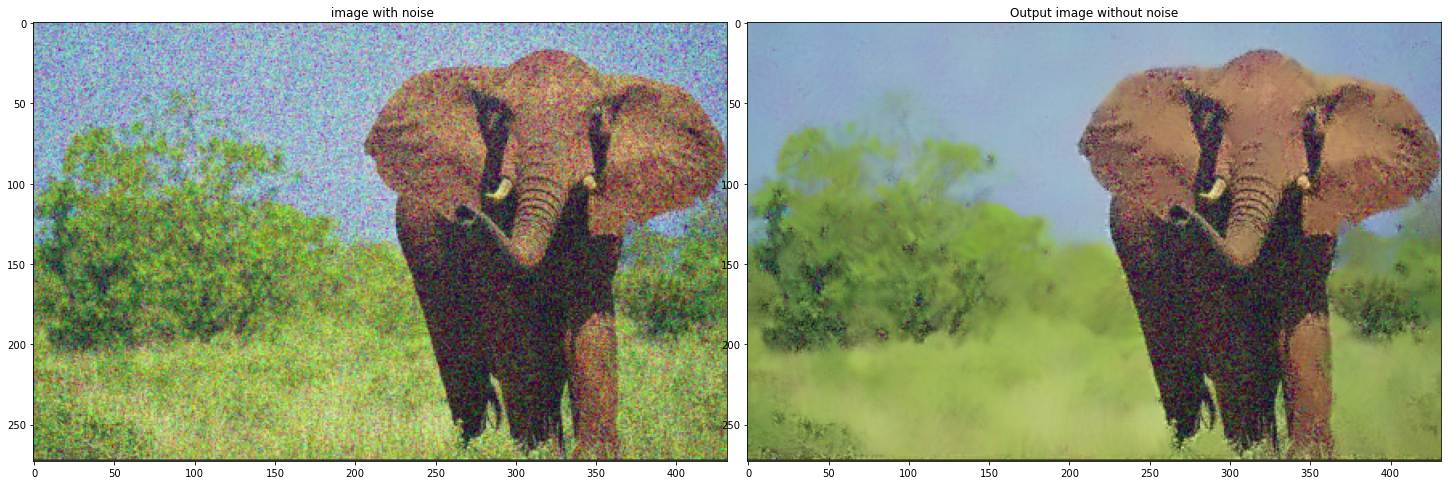

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgbruit = cv2.imread('elephbruit.png')
b,g,r = cv2.split(imgbruit)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(imgbruit,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

#plt.figure(figsize=(18,24))
fig, axs = plt.subplots(1, 2, figsize=(20, 20), constrained_layout=True)

plt.subplot(121),plt.imshow(rgb_img),plt.title(' image with noise')

plt.subplot(122),plt.imshow(rgb_dst),plt.title('Output image without noise')
plt.show()

In [ ]:
# Après l'application de filtre , on remarque que le bruit est bien éliminer de l'image mais pas totalement
#On applique une autre fois le filtre pour éliminer de plus le bruit 

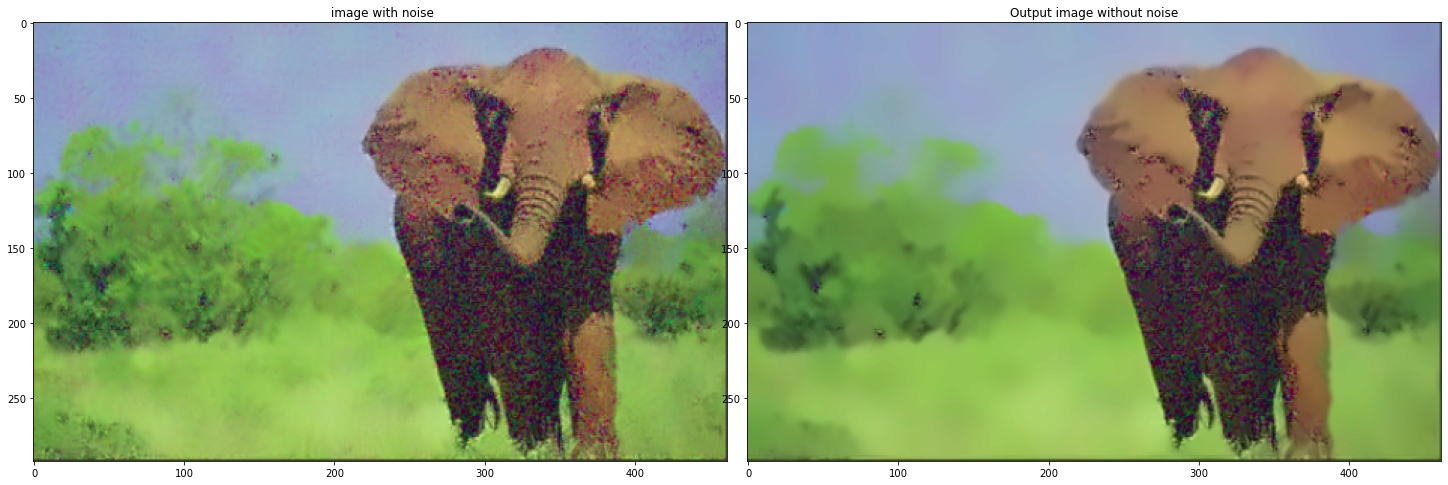

In [3]:
imgbruit = cv2.imread('elephbruit2.png')
b,g,r = cv2.split(imgbruit)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(imgbruit,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

#plt.figure(figsize=(18,24))
fig, axs = plt.subplots(1, 2, figsize=(20, 20), constrained_layout=True)

plt.subplot(121),plt.imshow(rgb_img),plt.title(' image with noise')

plt.subplot(122),plt.imshow(rgb_dst),plt.title('Output image without noise')
plt.show()

In [ ]:
#voilà le bruit est bien éliminer